# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers


# OBJECTIVE:
To Analyze the given data-set to find and conclude the E-retail factors for activation & retention of customers

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sn


In [51]:
import pandas as pd

df = pd.read_excel ('customer_retention_dataset.xlsx')
print (df)

    1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266   

In [52]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [53]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [54]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [55]:
#show the shape
print("Dataset shape:", df.shape)

Dataset shape: (269, 71)


In [56]:
# show the male and female
df['1Gender of respondent'].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
#total value of male and female
df['1Gender of respondent'].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

C:\Users\jesus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


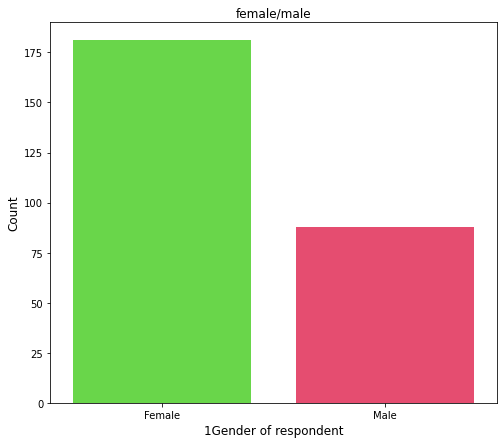

In [58]:
#visual of male and female
count = df['1Gender of respondent'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('1Gender of respondent', fontsize=12)
plt.title('female/male')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [59]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['4 What is the Pin Code of where you shop online from?'], object: ['1Gender of respondent', '2 How old are you? ', '3 Which city do you shop online from?', '5 Since How Long You are Shopping Online ?', '6 How many times you have made an online purchase in the past 1 year?', '7 How do you access the internet while shopping on-line?', '8 Which device do you use to access the online shopping?', '9 What is the screen size of your mobile device?						                                        ', '10 What is the operating system (OS) of your device?				                                          ', '11 What browser do you run on your device to access the website?			                                                          ', '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ', '13 After first visit, how do you reach the online retail store?				                                     

In [60]:
df = df.astype('category')
df.dtypes

1Gender of respondent                                                   category
2 How old are you?                                                      category
3 Which city do you shop online from?                                   category
4 What is the Pin Code of where you shop online from?                   category
5 Since How Long You are Shopping Online ?                              category
                                                                          ...   
Longer delivery period                                                  category
Change in website/Application design                                    category
Frequent disruption when moving from one page to another                category
Website is as efficient as before                                       category
Which of the Indian online retailer would you recommend to a friend?    category
Length: 71, dtype: object

C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

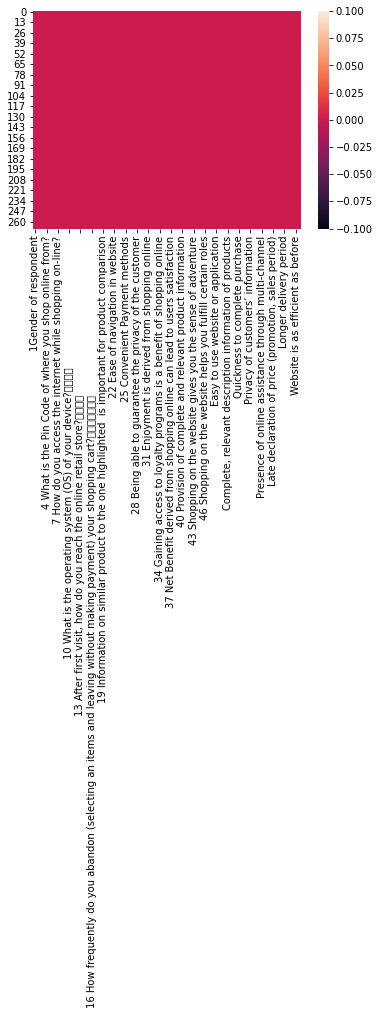

In [61]:
# to check the null value
sns.heatmap(df.isnull())

In [62]:
#convert catergorical value into numerical value
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [35]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1,1,2,1,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,5,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,23,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,11,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
4,0,0,0,31,1,0,3,2,0,1,...,5,8,5,8,7,3,0,7,6,3


array([[<AxesSubplot:title={'center':'1Gender of respondent'}>,
        <AxesSubplot:title={'center':'2 How old are you? '}>,
        <AxesSubplot:title={'center':'3 Which city do you shop online from?'}>,
        <AxesSubplot:title={'center':'4 What is the Pin Code of where you shop online from?'}>,
        <AxesSubplot:title={'center':'5 Since How Long You are Shopping Online ?'}>,
        <AxesSubplot:title={'center':'6 How many times you have made an online purchase in the past 1 year?'}>,
        <AxesSubplot:title={'center':'7 How do you access the internet while shopping on-line?'}>,
        <AxesSubplot:title={'center':'8 Which device do you use to access the online shopping?'}>],
       [<AxesSubplot:title={'center':'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '}>,
        <AxesSubplot:title={'center':'10 What is the operating system (OS) of your device?\t\t\t\t                                          '}>,
        <AxesS

C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


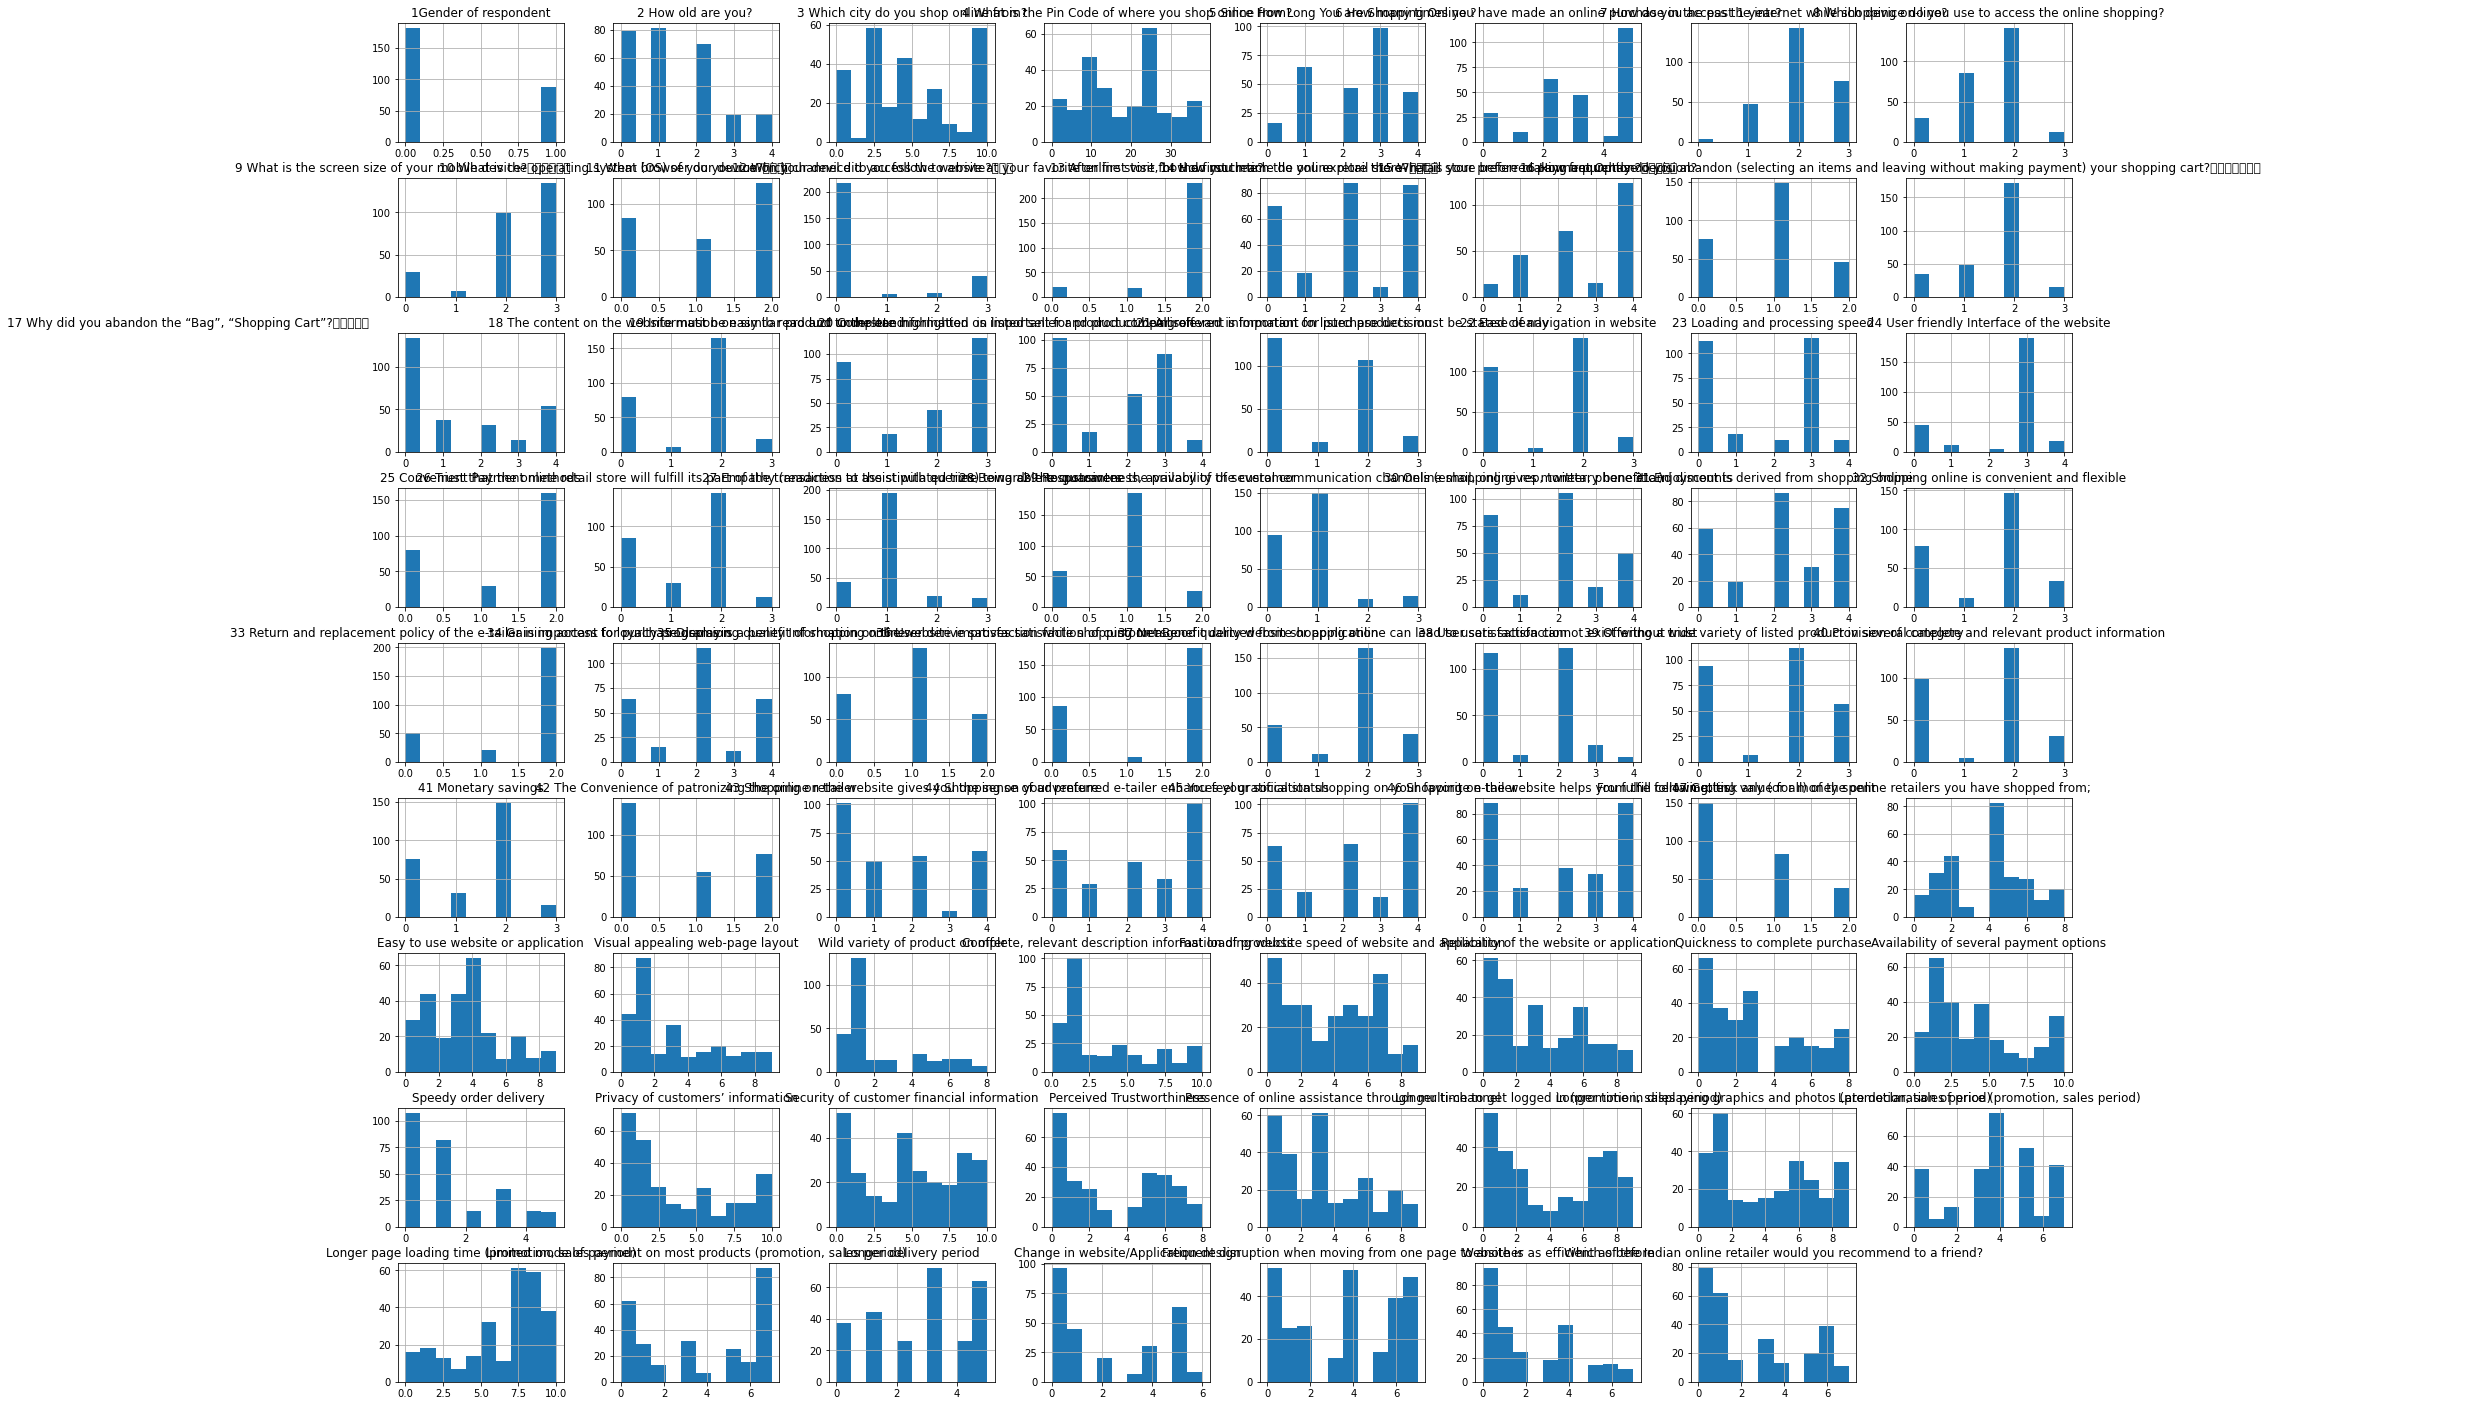

In [36]:
df.hist(figsize=(30,25))

OBSERVATION ON CUSTOMER INFO:
1.Out of the entire participant around 67.3 %( 181 members) are women and 32.7 %( 88 members) are men.

2.80% (230 members) of the total participants are between the age group of 21-50 years, in which 21-30 years are 
79 members, 31-40 years are 81 members and 41-50 years are 70 members.

3.Participants from Delhi, Noida, Greater Noida and Bangalore seem to be shopping in 
higher range when considered to other cities included for the survey. This may be due to 
the fact that many companies and colleges are around this area.

4.Around 65% of the total participants are shopping online for more than 3 years.

5.Major part of the customers seems to be shopping less than 10 times a year.

6.Most of the customers seem to be using Smart Phone and Mobile Internet for shopping. This means
the E-commerce website should be compatible in all kinds of smart phone browsers to attract a lot more customers.

7.Many used search engine to find their favorite online store, which means the E-commerce website
should be search engine optimized on all times.

8.Also after the search engine, E-commerce application seems to be the second favorite mode of 
logging in to the website. This means the application should be server and software supported at all times.

9.Most of the participants seem to be spending an average of more than 15mins in the website for shopping.

10.Most participants desire to pay via Credit/ Debit cards while shopping online.

2    164
0     80
3     18
1      7
Name: 18 The content on the website must be easy to read and understand, dtype: int64


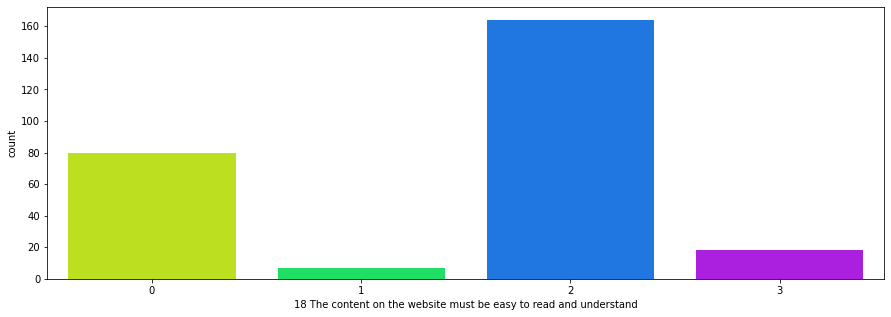

*******************************************************************************************************************************



3    116
0     92
2     43
1     18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64


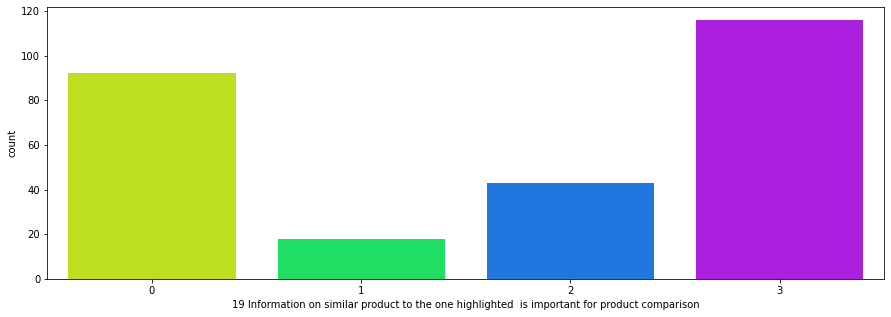

*******************************************************************************************************************************



0    101
3     87
2     52
1     18
4     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


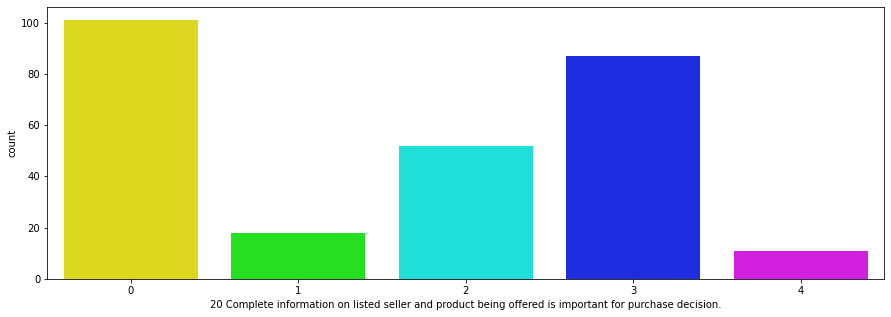

*******************************************************************************************************************************



0    132
2    107
3     18
1     12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64


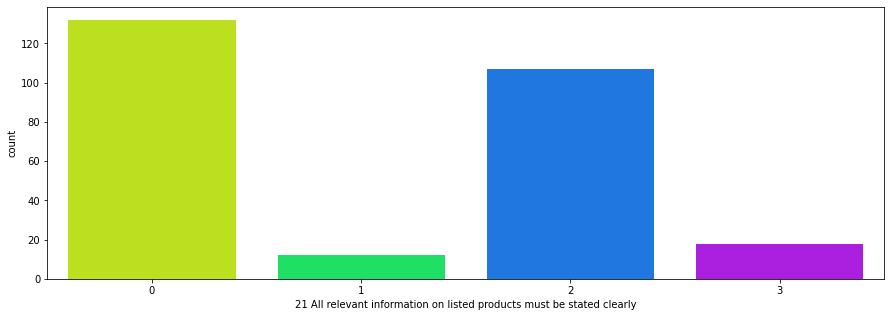

*******************************************************************************************************************************



2    141
0    105
3     18
1      5
Name: 22 Ease of navigation in website, dtype: int64


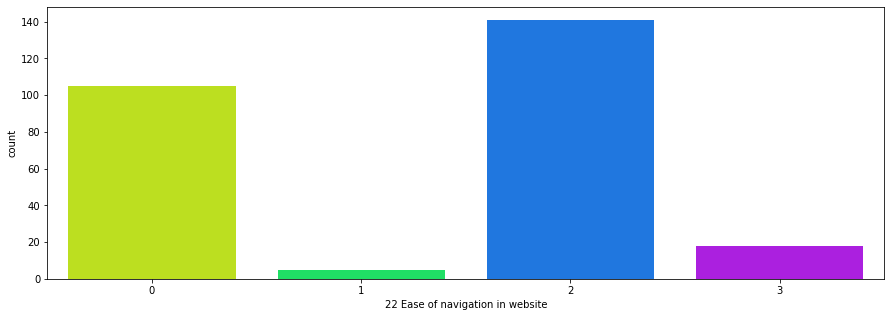

*******************************************************************************************************************************



3    115
0    112
1     18
4     12
2     12
Name: 23 Loading and processing speed, dtype: int64


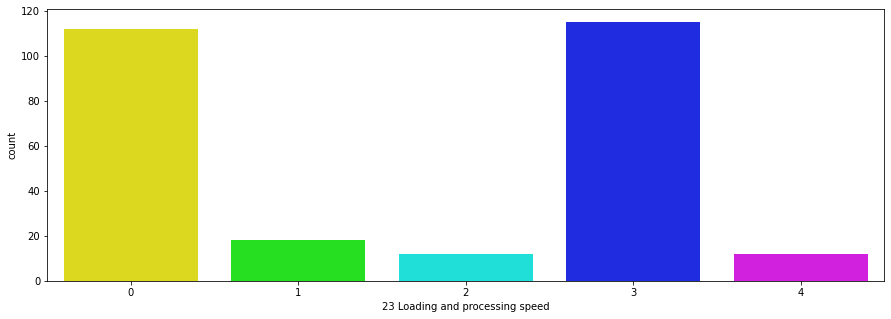

*******************************************************************************************************************************



3    189
0     45
4     18
1     12
2      5
Name: 24 User friendly Interface of the website, dtype: int64


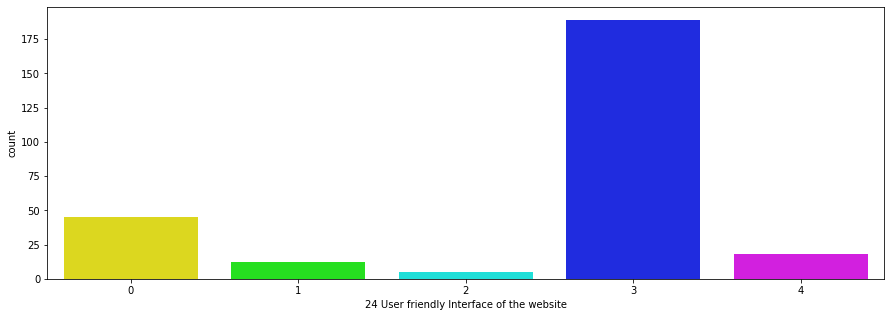

*******************************************************************************************************************************



2    159
0     80
1     30
Name: 25 Convenient Payment methods, dtype: int64


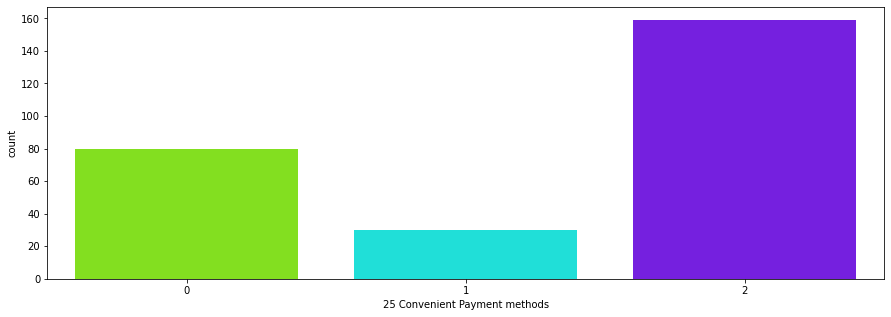

*******************************************************************************************************************************



2    141
0     86
1     30
3     12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


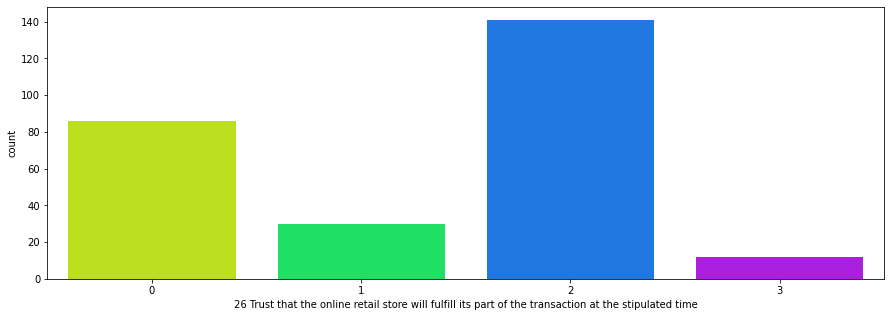

*******************************************************************************************************************************



1    194
0     42
2     18
3     15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


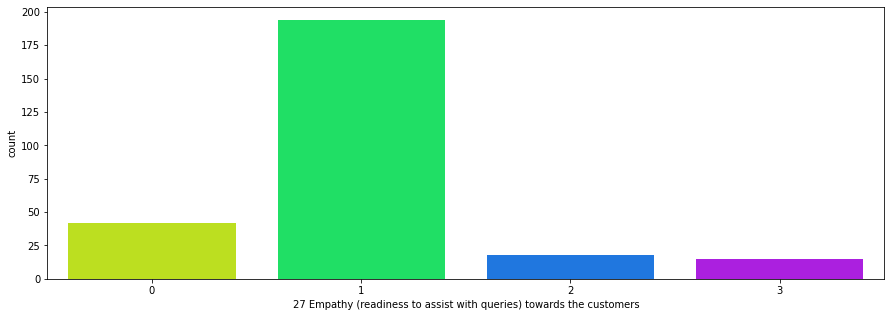

*******************************************************************************************************************************



1    185
0     58
2     26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


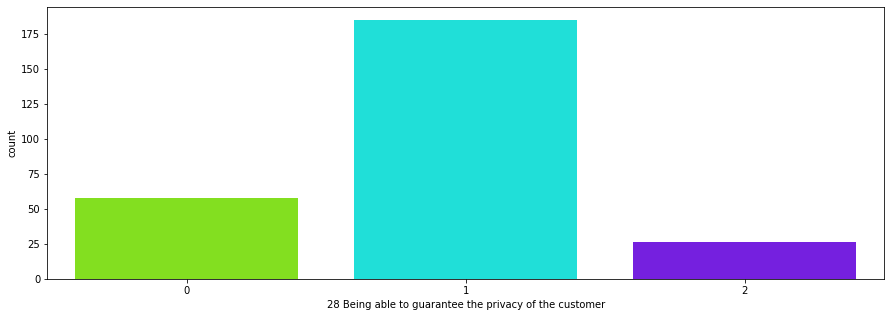

*******************************************************************************************************************************



1    149
0     94
3     15
2     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


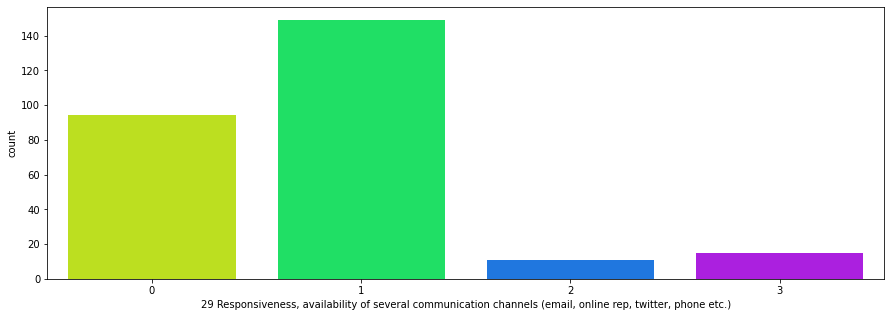

*******************************************************************************************************************************



2    105
0     85
4     50
3     18
1     11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64


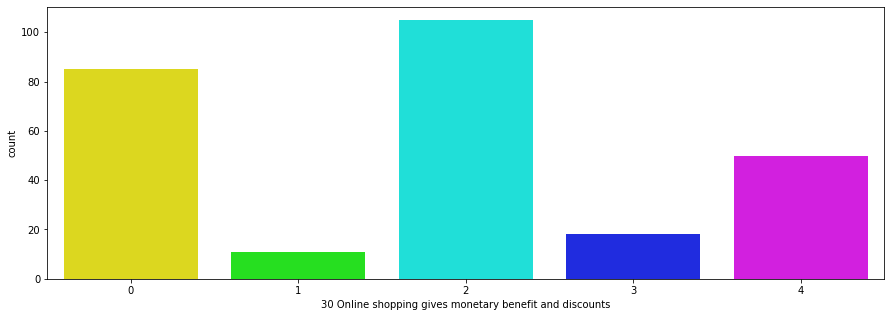

*******************************************************************************************************************************



2    86
4    75
0    59
3    30
1    19
Name: 31 Enjoyment is derived from shopping online, dtype: int64


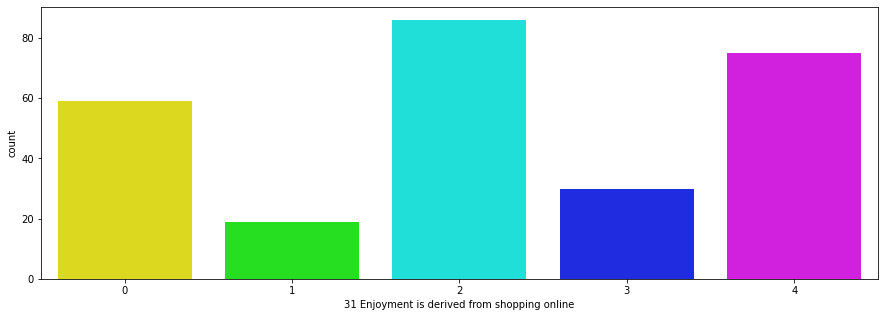

*******************************************************************************************************************************



2    146
0     78
3     33
1     12
Name: 32 Shopping online is convenient and flexible, dtype: int64


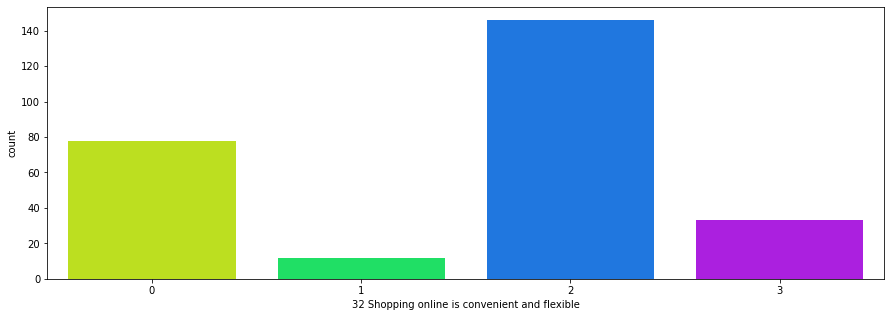

*******************************************************************************************************************************



2    198
0     51
1     20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


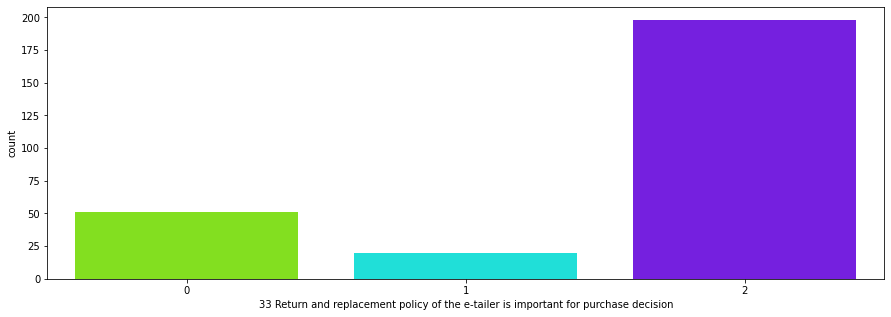

*******************************************************************************************************************************



2    115
4     64
0     64
1     15
3     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64


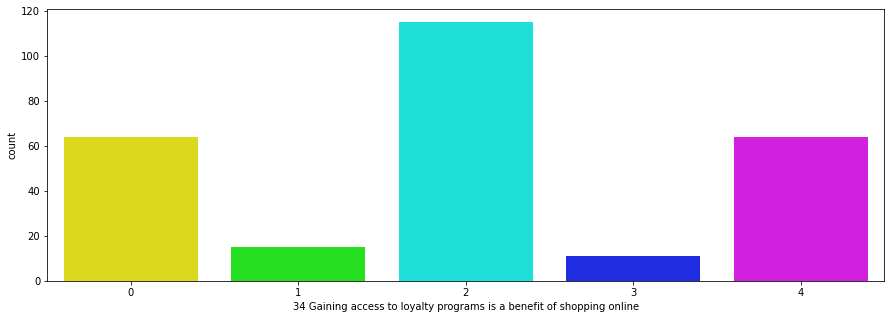

*******************************************************************************************************************************



1    133
0     80
2     56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64


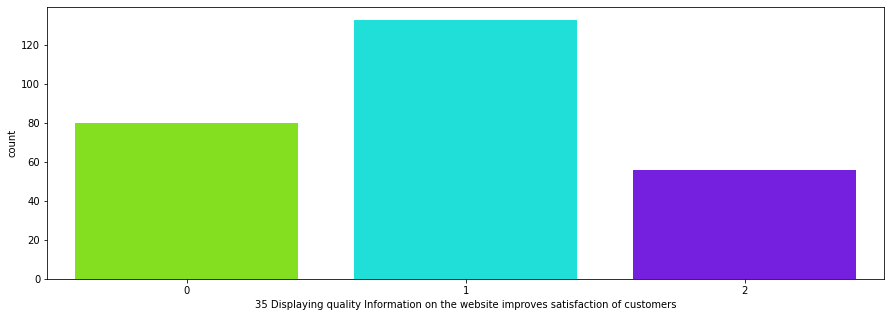

*******************************************************************************************************************************



2    175
0     86
1      8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64


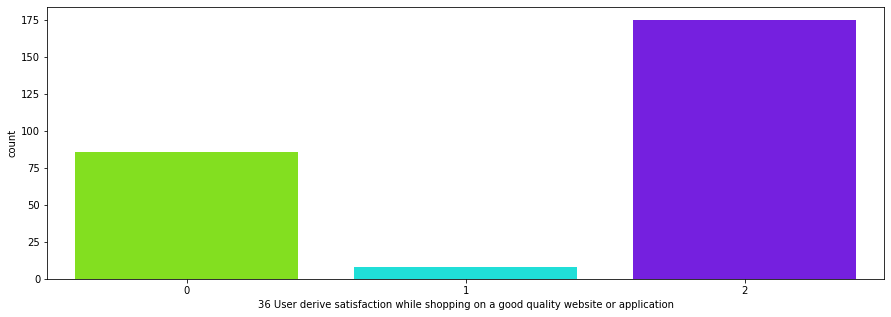

*******************************************************************************************************************************



2    164
0     54
3     40
1     11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


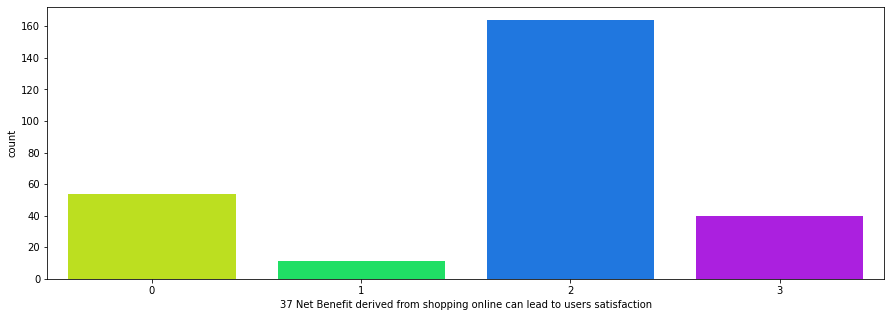

*******************************************************************************************************************************



2    122
0    117
3     18
1      7
4      5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


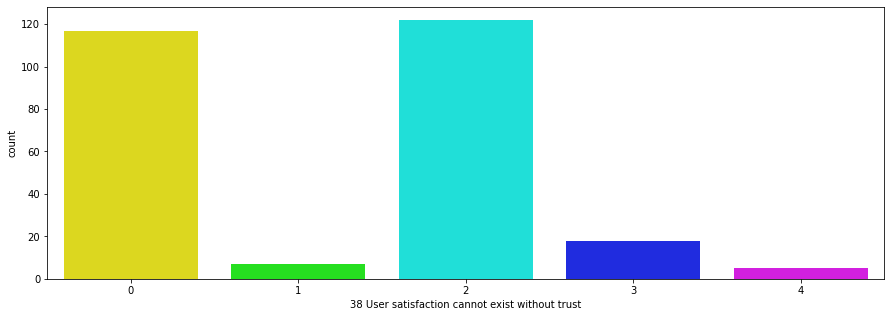

*******************************************************************************************************************************



2    111
0     94
3     57
1      7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64


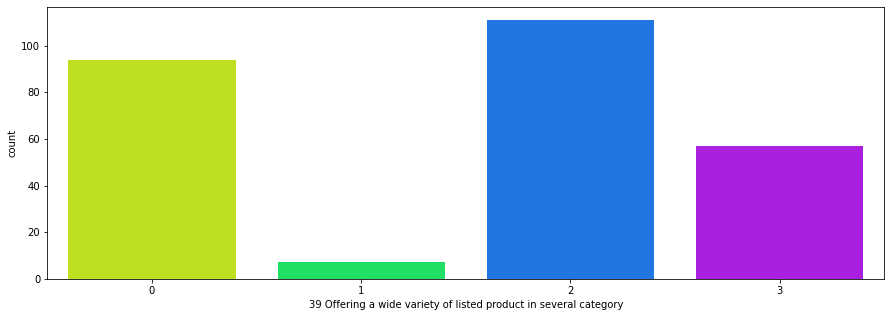

*******************************************************************************************************************************



2    135
0     98
3     31
1      5
Name: 40 Provision of complete and relevant product information, dtype: int64


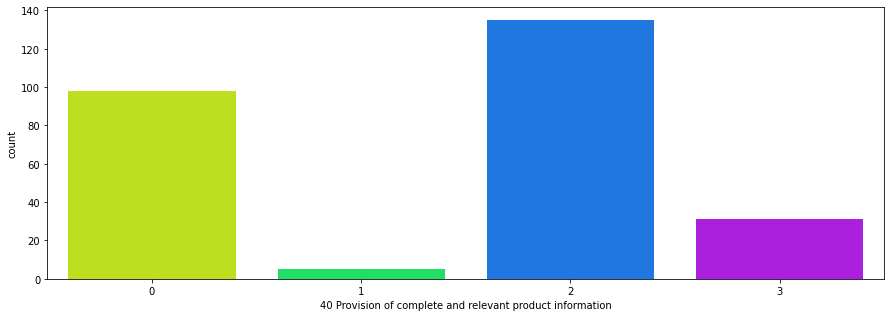

*******************************************************************************************************************************



2    148
0     75
1     31
3     15
Name: 41 Monetary savings, dtype: int64


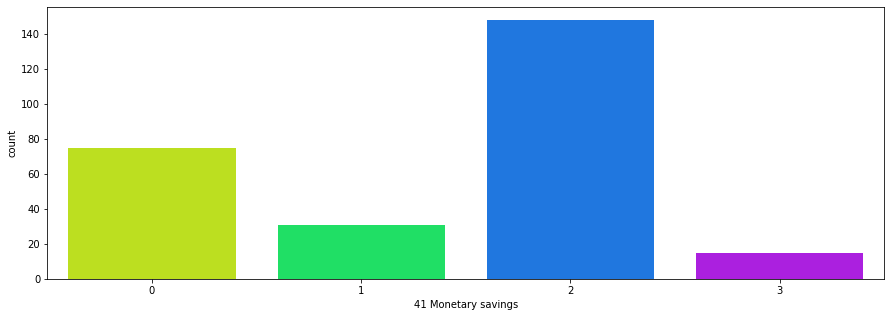

*******************************************************************************************************************************





In [73]:
#Basic info about the customer
cust_info_cols=df.iloc[:,1:15].columns
cutomer_info_columns=cust_info_cols.to_list()


cutomer_info_columns

for col in Utilitarian_Value_Columns:
        print(df[col].value_counts())
        plt.figure(figsize=(15,5))
        sn.countplot(x=df[col],palette="hsv")
        plt.show()
        print("*"*127)
        print("\n\n")




2    164
0     80
3     18
1      7
Name: 18 The content on the website must be easy to read and understand, dtype: int64


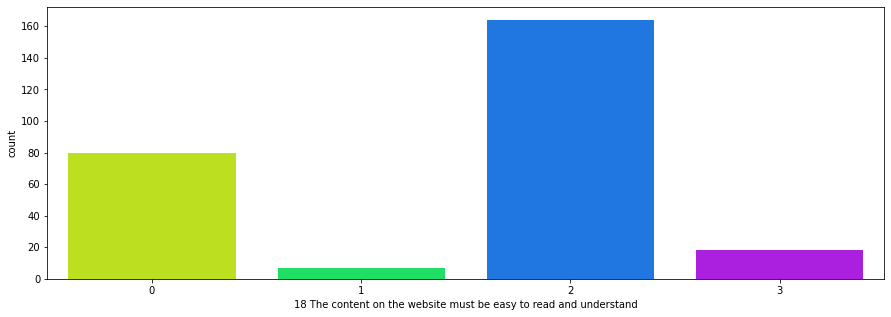

*******************************************************************************************************************************



3    116
0     92
2     43
1     18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64


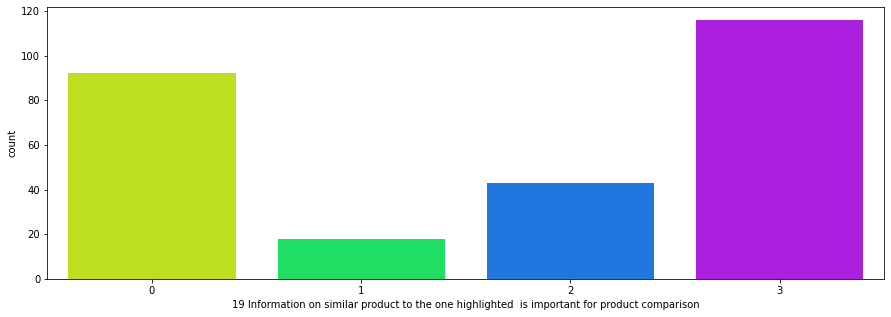

*******************************************************************************************************************************



0    101
3     87
2     52
1     18
4     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


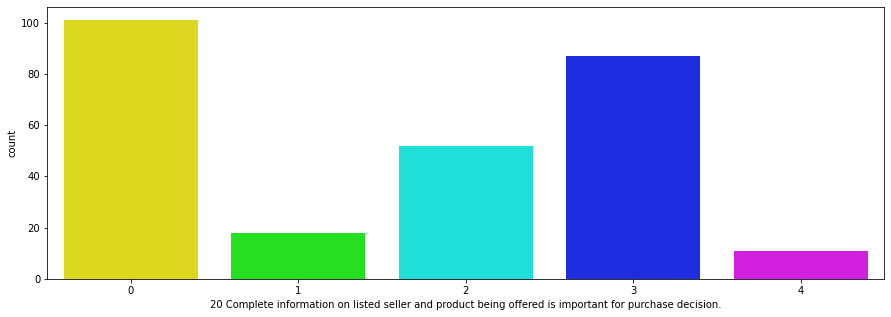

*******************************************************************************************************************************



0    132
2    107
3     18
1     12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64


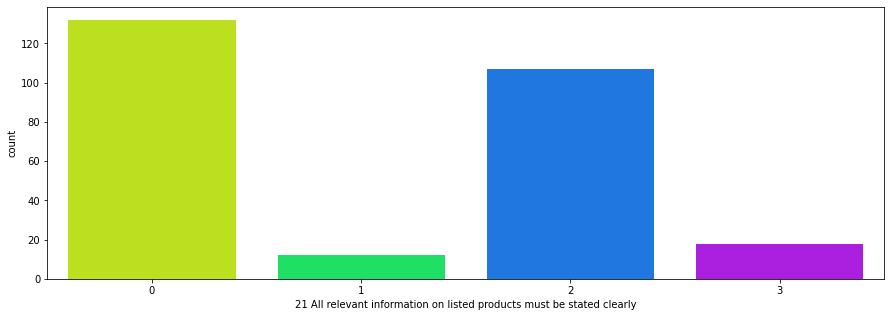

*******************************************************************************************************************************



2    141
0    105
3     18
1      5
Name: 22 Ease of navigation in website, dtype: int64


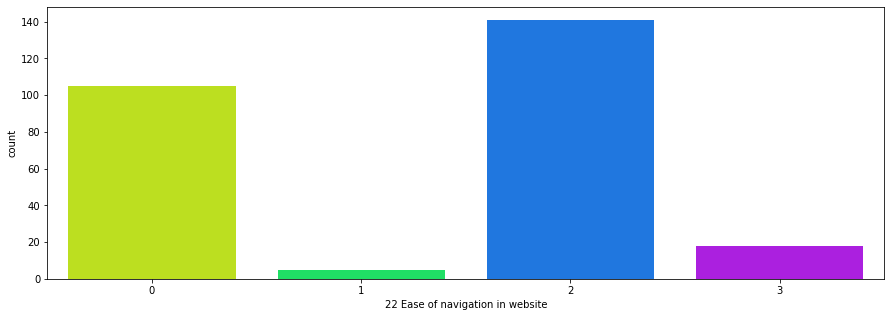

*******************************************************************************************************************************



3    115
0    112
1     18
4     12
2     12
Name: 23 Loading and processing speed, dtype: int64


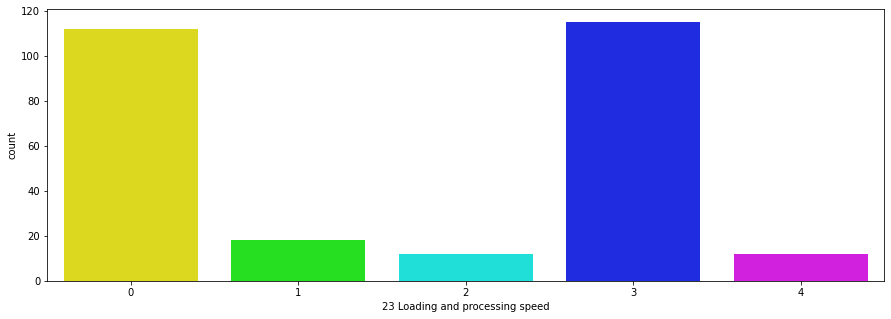

*******************************************************************************************************************************



3    189
0     45
4     18
1     12
2      5
Name: 24 User friendly Interface of the website, dtype: int64


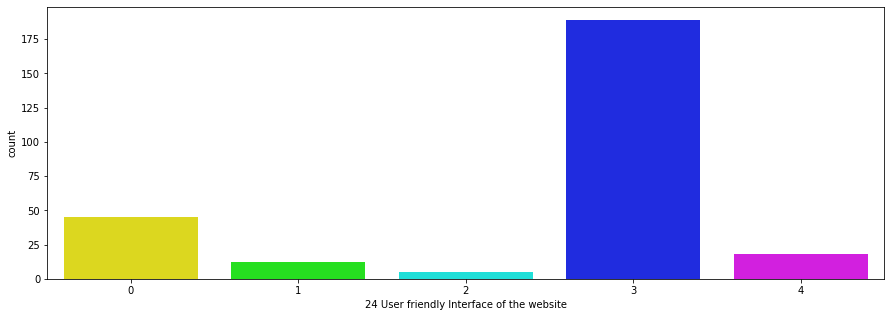

*******************************************************************************************************************************



2    159
0     80
1     30
Name: 25 Convenient Payment methods, dtype: int64


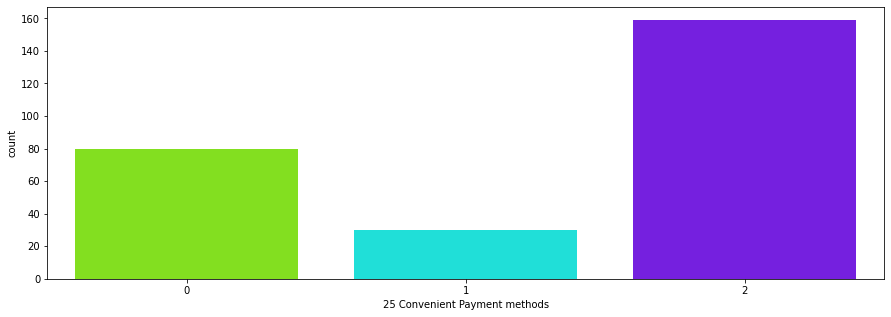

*******************************************************************************************************************************



2    141
0     86
1     30
3     12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


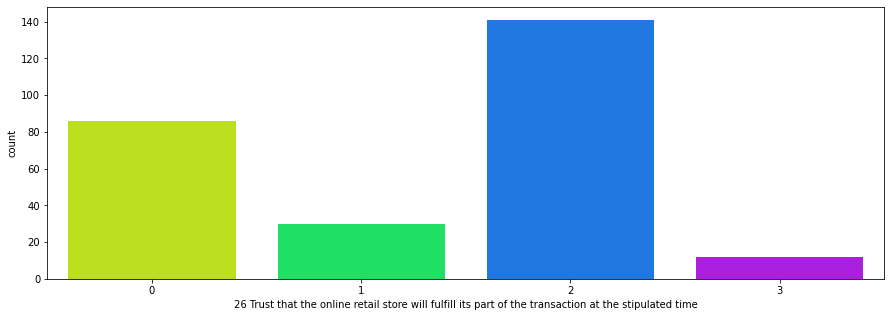

*******************************************************************************************************************************



1    194
0     42
2     18
3     15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


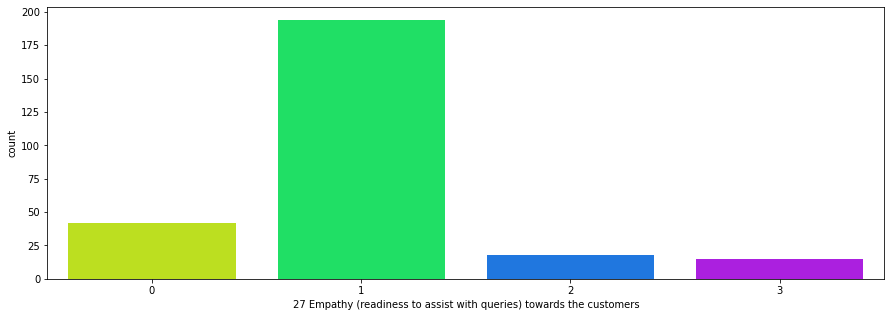

*******************************************************************************************************************************



1    185
0     58
2     26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


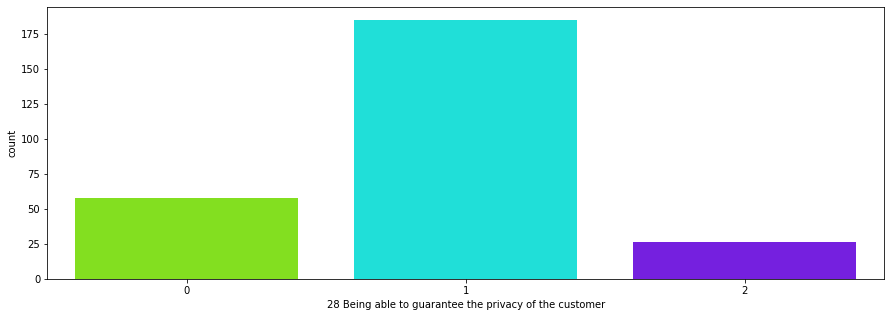

*******************************************************************************************************************************



1    149
0     94
3     15
2     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


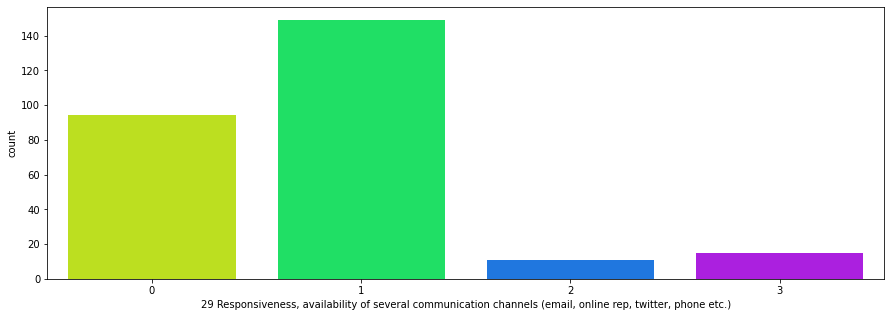

*******************************************************************************************************************************



2    105
0     85
4     50
3     18
1     11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64


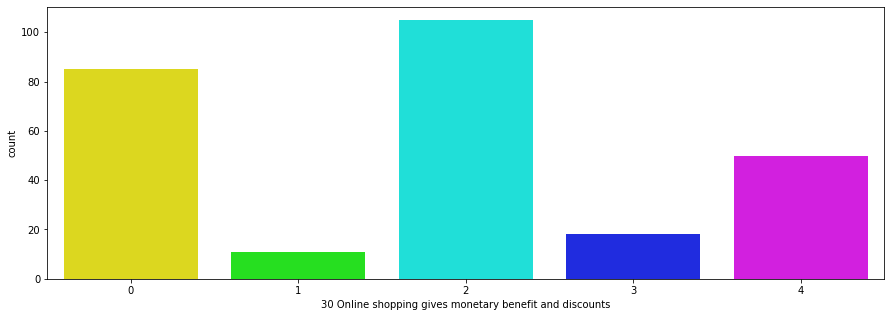

*******************************************************************************************************************************



2    86
4    75
0    59
3    30
1    19
Name: 31 Enjoyment is derived from shopping online, dtype: int64


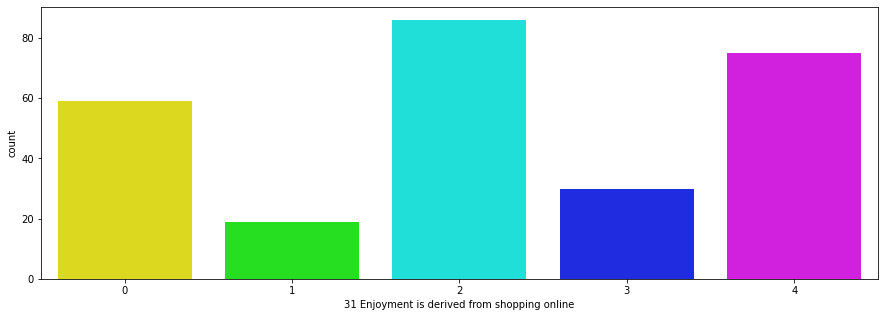

*******************************************************************************************************************************



2    146
0     78
3     33
1     12
Name: 32 Shopping online is convenient and flexible, dtype: int64


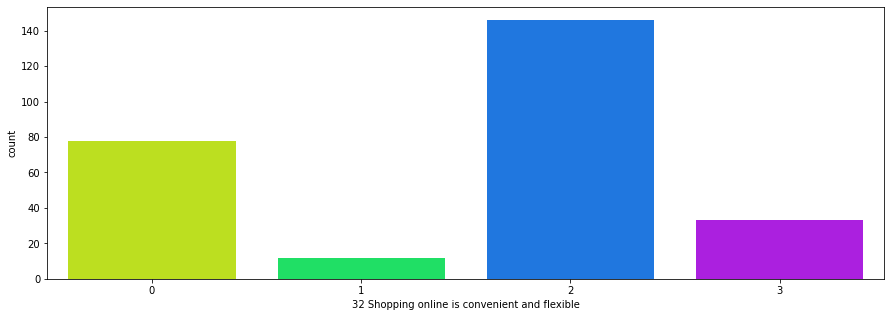

*******************************************************************************************************************************



2    198
0     51
1     20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


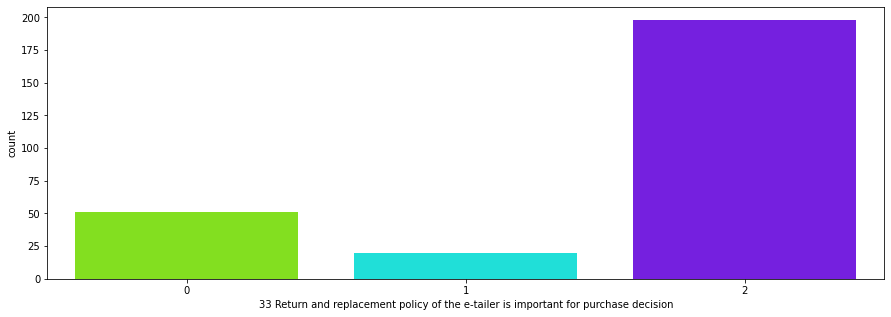

*******************************************************************************************************************************



2    115
4     64
0     64
1     15
3     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64


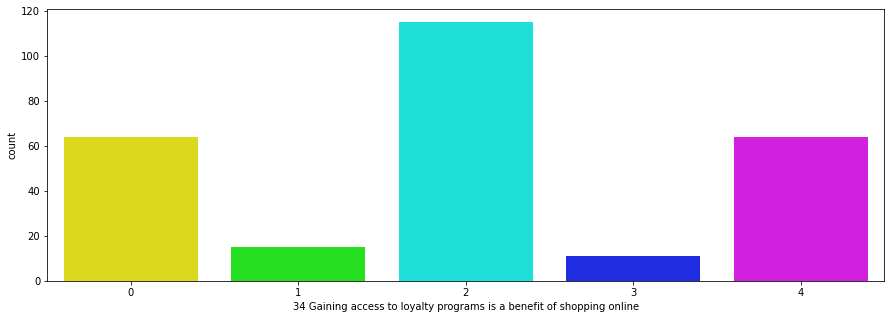

*******************************************************************************************************************************



1    133
0     80
2     56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64


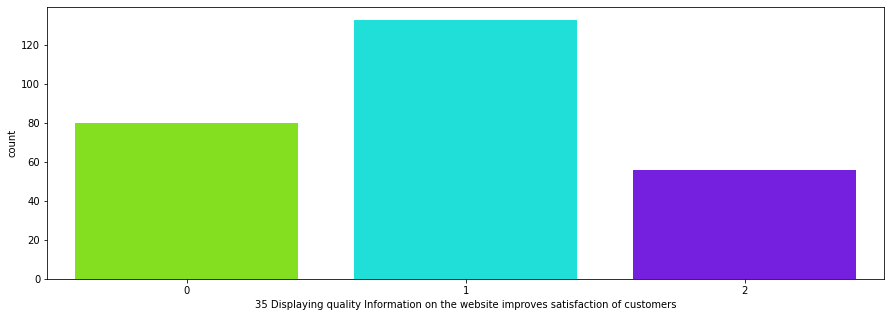

*******************************************************************************************************************************



2    175
0     86
1      8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64


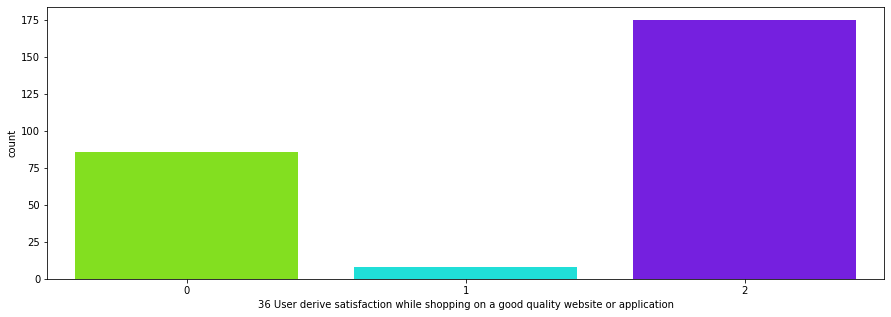

*******************************************************************************************************************************



2    164
0     54
3     40
1     11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


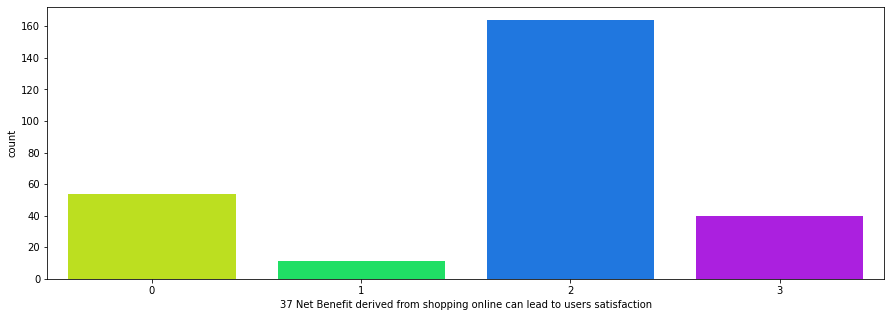

*******************************************************************************************************************************



2    122
0    117
3     18
1      7
4      5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


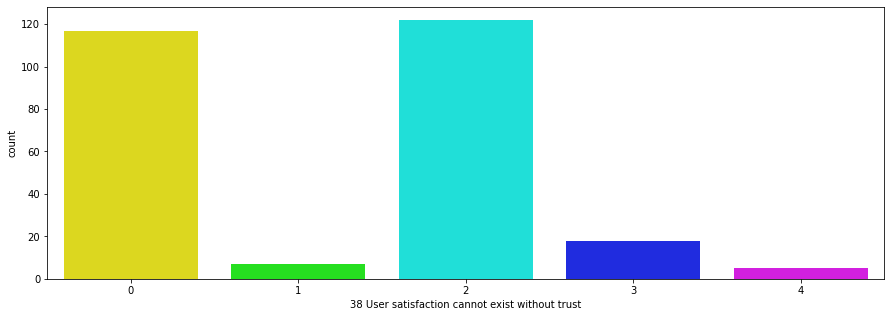

*******************************************************************************************************************************



2    111
0     94
3     57
1      7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64


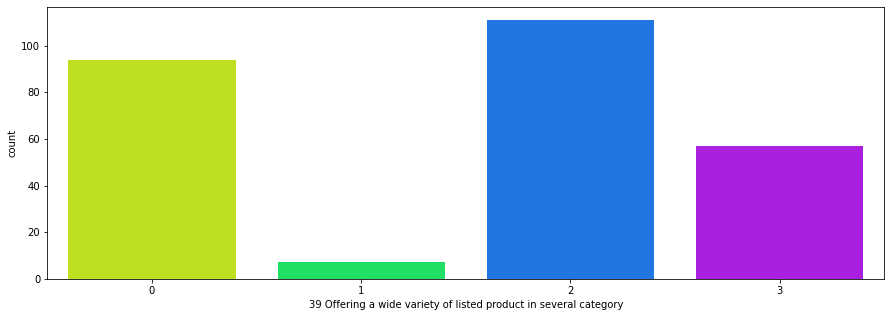

*******************************************************************************************************************************



2    135
0     98
3     31
1      5
Name: 40 Provision of complete and relevant product information, dtype: int64


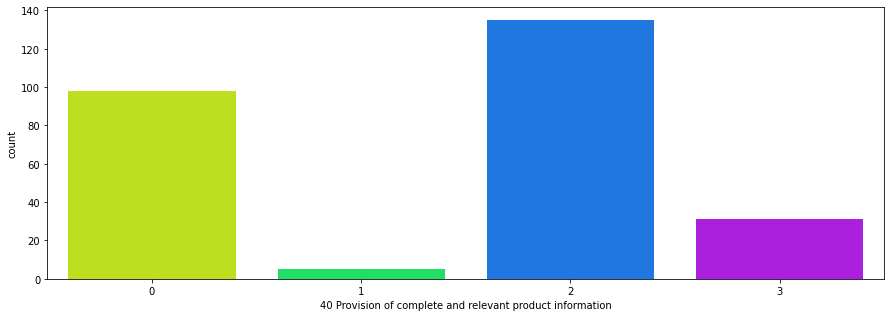

*******************************************************************************************************************************



2    148
0     75
1     31
3     15
Name: 41 Monetary savings, dtype: int64


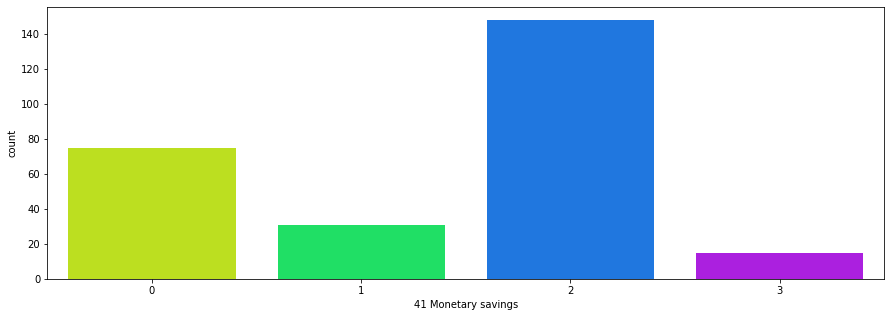

*******************************************************************************************************************************





In [65]:
#Utilitarian Value Columns
util_cols=df.iloc[:,17:41].columns
Utilitarian_Value_Columns=util_cols.to_list()


Utilitarian_Value_Columns


for col in Utilitarian_Value_Columns:
        print(df[col].value_counts())
        plt.figure(figsize=(15,5))
        sn.countplot(x=df[col],palette="hsv")
        plt.show()
        print("*"*127)
        print("\n\n")

OBSERVATION ON UTILITARIAN VALUES:
1.Most of the participants strongly agree that the content on the website must be easy to read and understand.

2.Around 80% of the total customer strongly agrees that the information on similar product to the one highlighted is
important for product comparison.

3.Most of the participants agree with the fact that provision of complete information on listed seller and 
product being offered is important for purchase decision.

4.Most of the customers expect that all relevant information on listed products must be stated clearly.

5.90% of the customer expects a user friendly interface of the website along with ease of navigation; also 
they want the loading and processing speed to be less.

6.Most customers want many options for payment methods so that they can choose which is convenient them individually.

7.Most people expect the E-commerce website to have empathy towards its customers, they want 
to approach the in all platforms.

8.All the customers expect a guaranteed privacy.

9.Most customers choose online shopping because of the monetary benefit and discounts.

10.Also many enjoy the process of online shopping, when it is convenient and flexible.

11.Most customers strongly agree that return and replacement policy of the product is important for purchase decision.

12.Around 80% of the participants choose online shopping because of the wide range of category on products.

0    138
2     77
1     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64


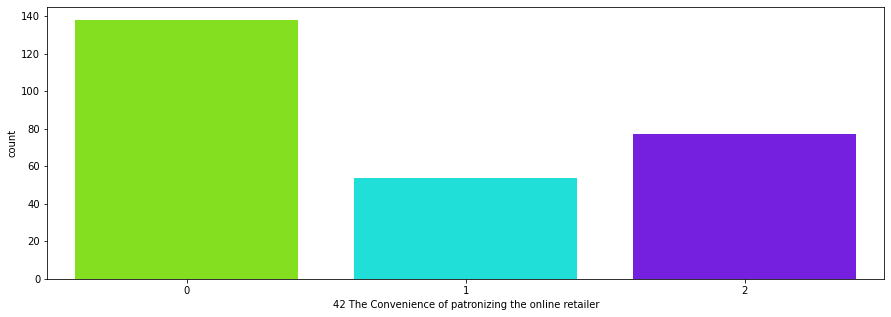

*******************************************************************************************************************************



0    101
4     59
2     54
1     50
3      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64


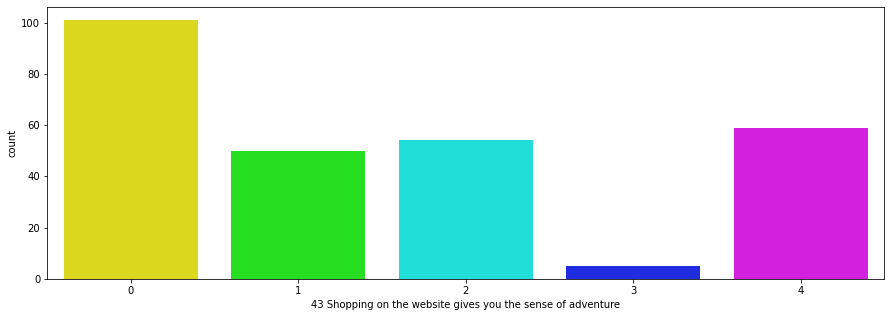

*******************************************************************************************************************************



4    100
0     59
2     48
3     33
1     29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64


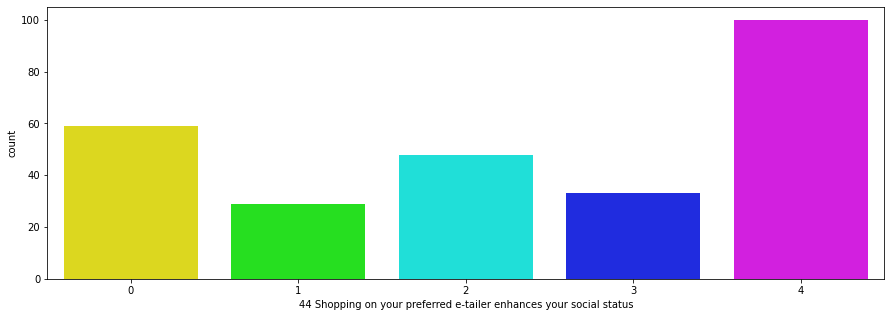

*******************************************************************************************************************************



4    101
2     65
0     63
1     22
3     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64


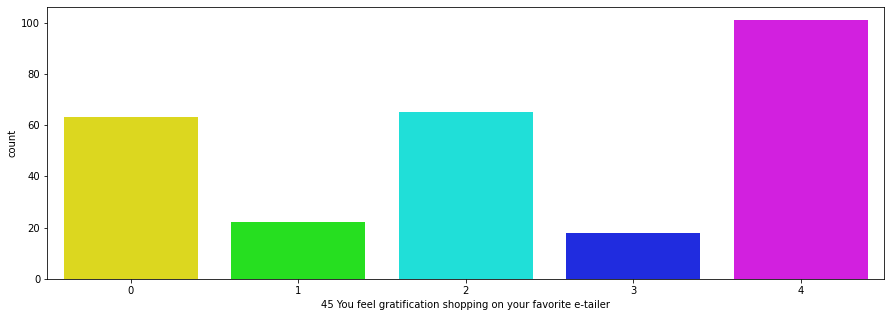

*******************************************************************************************************************************



4    88
0    88
2    38
3    33
1    22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64


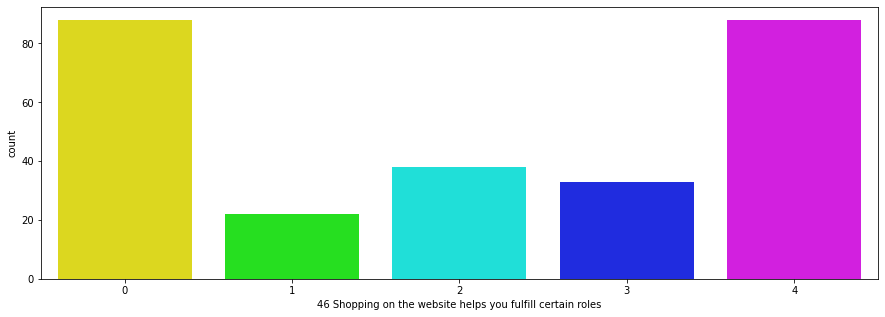

*******************************************************************************************************************************



0    149
1     82
2     38
Name: 47 Getting value for money spent, dtype: int64


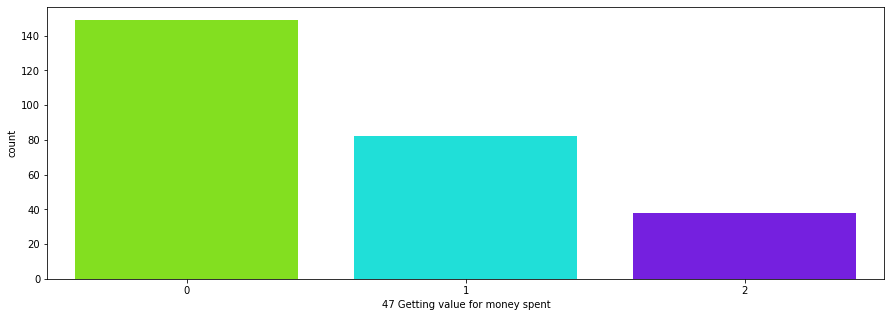

*******************************************************************************************************************************





In [68]:
#Hedonic value columns
hedonic_cols=df.iloc[:,41:47].columns
Hedonic_value_columns=hedonic_cols.to_list()


Hedonic_value_columns

for col in Hedonic_value_columns:
        print(df[col].value_counts())
        plt.figure(figsize=(15,5))
        sn.countplot(x=df[col],palette="hsv")
        plt.show()
        print("*"*127)
        print("\n\n")


## OBSERVATION ON HEDONIC VALUES:¶
1.65% participants agree that they like the convenience of patronizing the online retailer.

2.More than half of the customers doing online shopping accept that they like the sense of adventure while shopping online.

3.Many customers don’t agree that shopping on their preferred website enhances their social status.

4.Half of the total participants say that shopping on the website helps them fulfill certain roles.

5.90% of the customer agrees that they are getting value for money spent while shopping online.

2    171
1     48
0     35
3     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64


C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


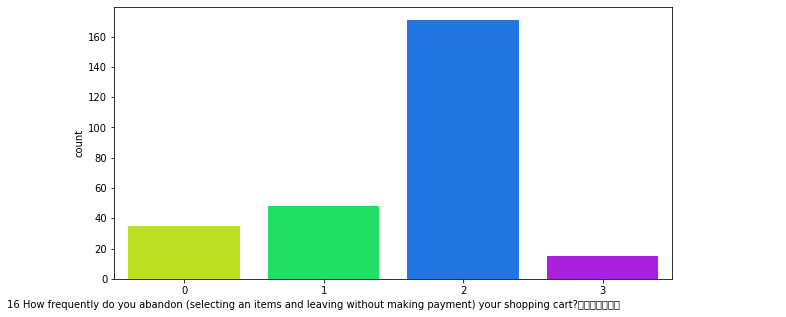

*******************************************************************************************************************************



0    133
4     54
1     37
2     31
3     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jesus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


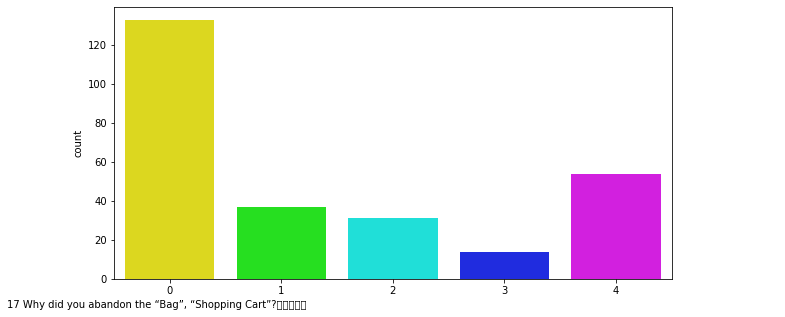

*******************************************************************************************************************************





In [69]:
#precieved Risk Columns
preci_risk=df.iloc[:,15:17].columns
Precieved_Risk_Columns=preci_risk.to_list()


Precieved_Risk_Columns

for col in Precieved_Risk_Columns:
        print(df[col].value_counts())
        plt.figure(figsize=(10,5))
        sn.countplot(x=df[col],palette="hsv")
        plt.show()
        print("*"*127)
        print("\n\n")

4    82
2    44
1    32
5    29
6    27
8    20
0    16
7    12
3     7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64


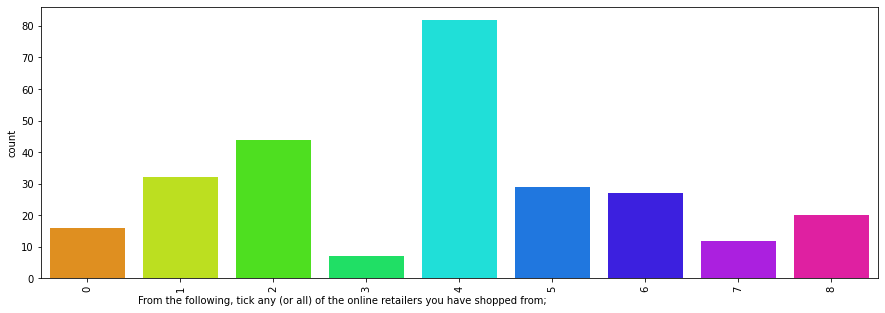

*******************************************************************************************************************************



4    64
3    44
1    44
0    29
5    22
7    20
2    19
9    12
8     8
6     7
Name: Easy to use website or application, dtype: int64


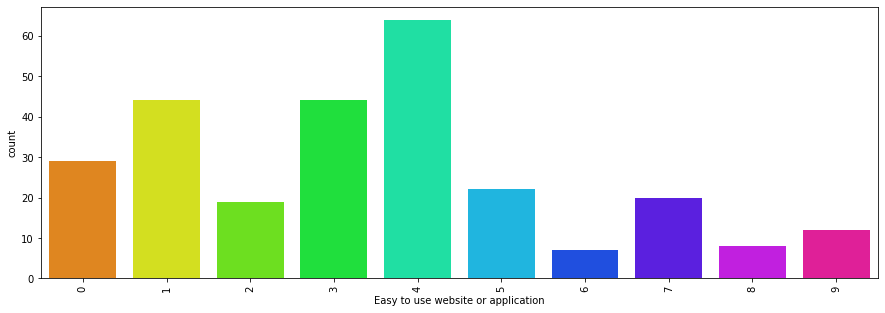

*******************************************************************************************************************************



1    87
0    44
3    36
6    20
9    15
8    15
5    15
2    14
7    12
4    11
Name: Visual appealing web-page layout, dtype: int64


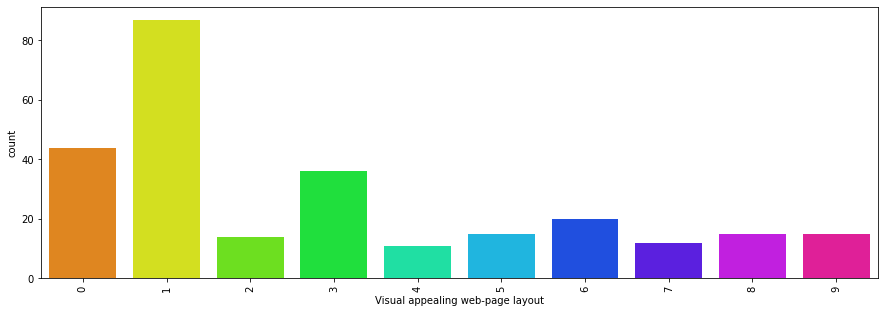

*******************************************************************************************************************************



1    130
0     43
4     20
7     15
6     15
2     14
3     13
5     12
8      7
Name: Wild variety of product on offer, dtype: int64


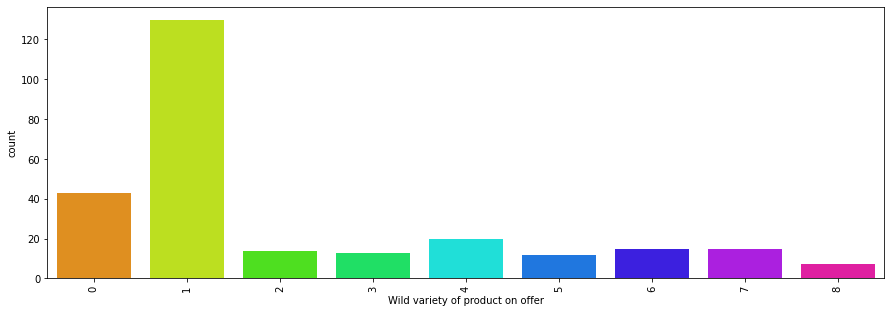

*******************************************************************************************************************************



1     100
0      43
4      24
7      20
5      15
2      15
3      14
10     12
9      11
8       8
6       7
Name: Complete, relevant description information of products, dtype: int64


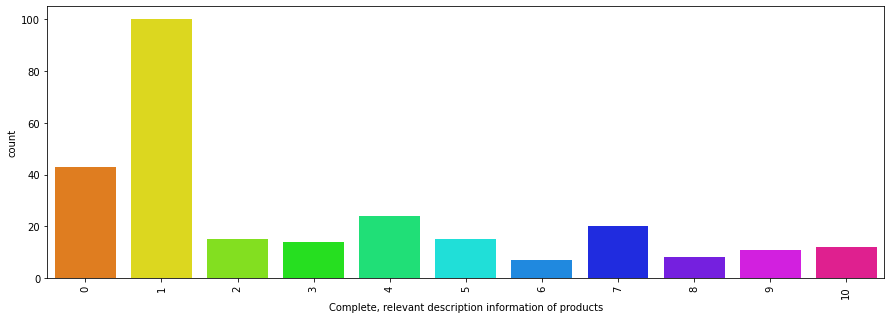

*******************************************************************************************************************************



0    51
7    44
5    30
2    30
1    30
6    25
4    25
3    14
9    12
8     8
Name: Fast loading website speed of website and application, dtype: int64


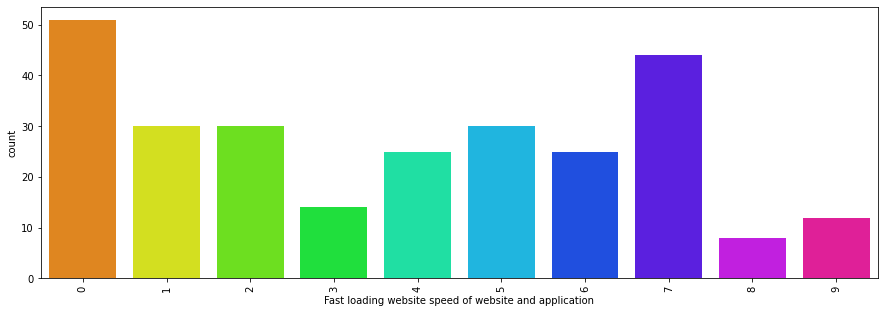

*******************************************************************************************************************************



0    61
1    50
3    36
6    35
5    18
8    15
7    15
2    14
4    13
9    12
Name: Reliability of the website or application, dtype: int64


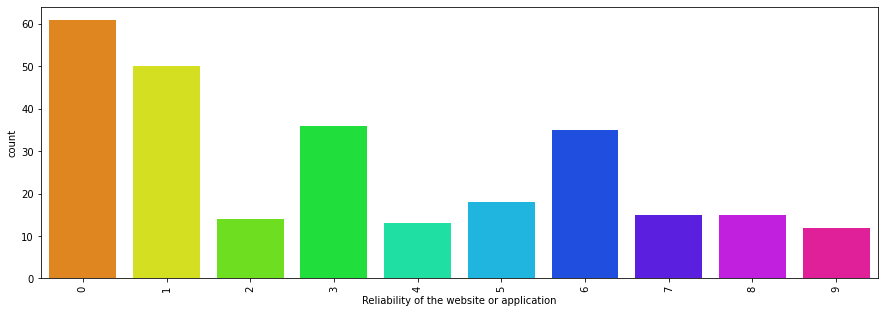

*******************************************************************************************************************************



0    66
3    47
1    37
2    30
8    25
5    20
6    15
4    15
7    14
Name: Quickness to complete purchase, dtype: int64


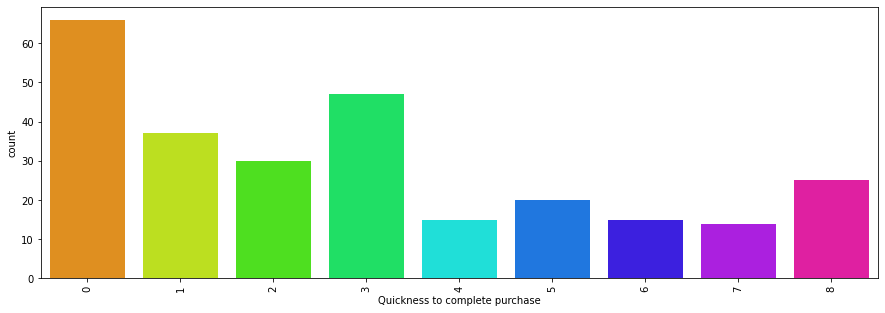

*******************************************************************************************************************************



1     65
2     40
4     39
0     23
10    20
3     19
5     18
8     14
9     12
6     11
7      8
Name: Availability of several payment options, dtype: int64


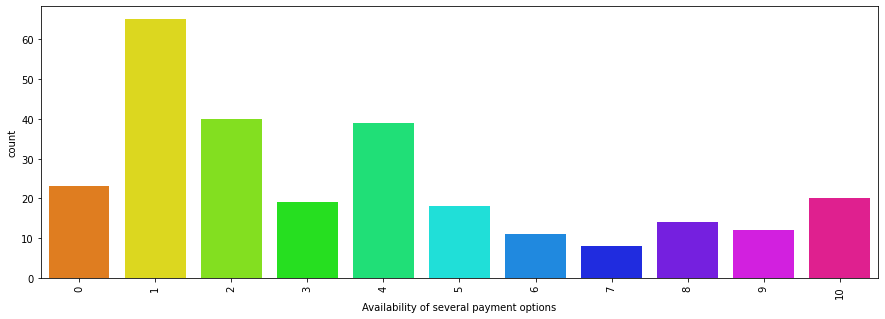

*******************************************************************************************************************************



0    107
1     82
3     36
4     15
2     15
5     14
Name: Speedy order delivery , dtype: int64


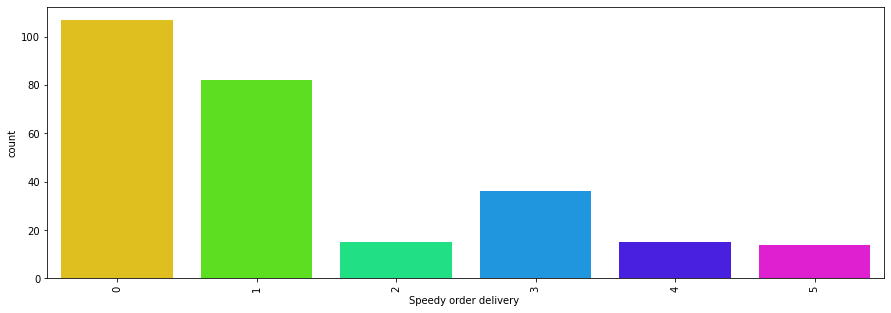

*******************************************************************************************************************************



0     71
1     54
2     25
5     24
10    18
9     15
8     15
7     15
3     14
4     11
6      7
Name: Privacy of customers’ information, dtype: int64


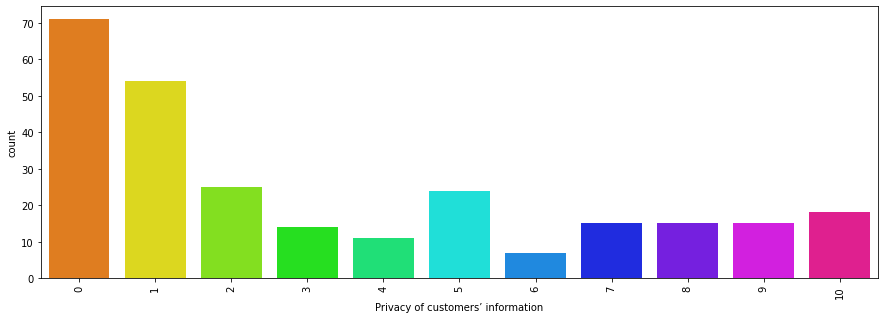

*******************************************************************************************************************************



0     51
4     42
8     33
5     25
1     24
6     20
7     19
10    15
9     15
2     14
3     11
Name: Security of customer financial information, dtype: int64


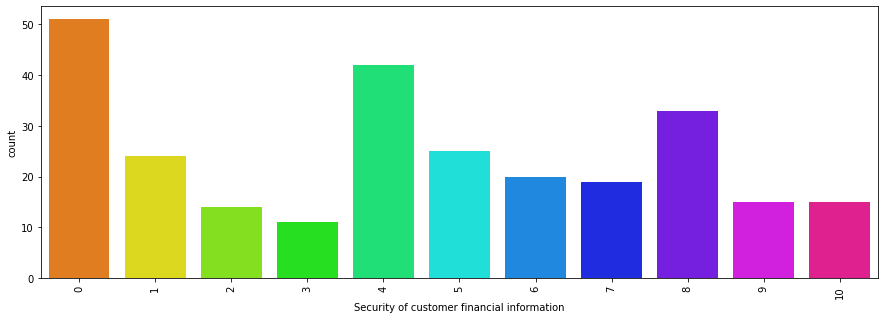

*******************************************************************************************************************************



0    76
5    36
6    35
1    31
7    27
2    25
8    15
4    13
3    11
Name: Perceived Trustworthiness, dtype: int64


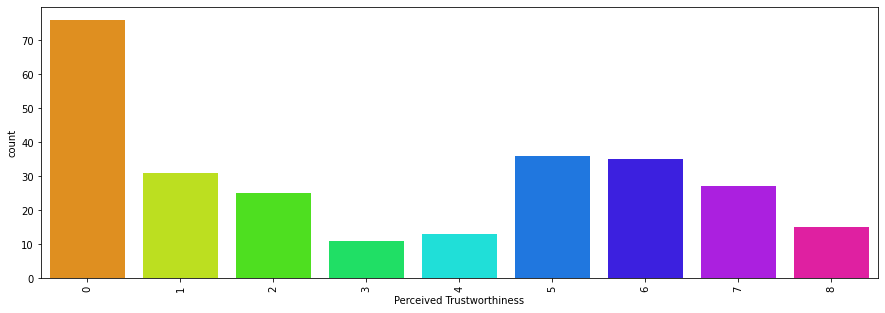

*******************************************************************************************************************************



3    61
0    60
1    39
6    26
8    20
5    15
2    15
4    13
9    12
7     8
Name: Presence of online assistance through multi-channel, dtype: int64


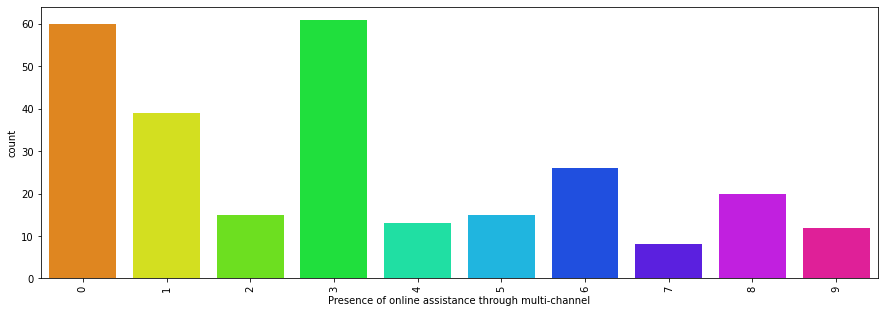

*******************************************************************************************************************************



0    57
8    38
1    38
7    35
2    29
9    25
5    15
6    13
3    11
4     8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


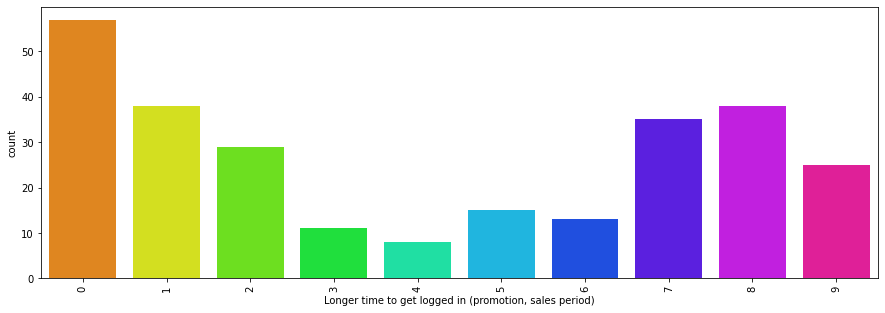

*******************************************************************************************************************************



1    60
0    39
6    35
9    34
7    25
5    19
8    15
4    15
2    14
3    13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


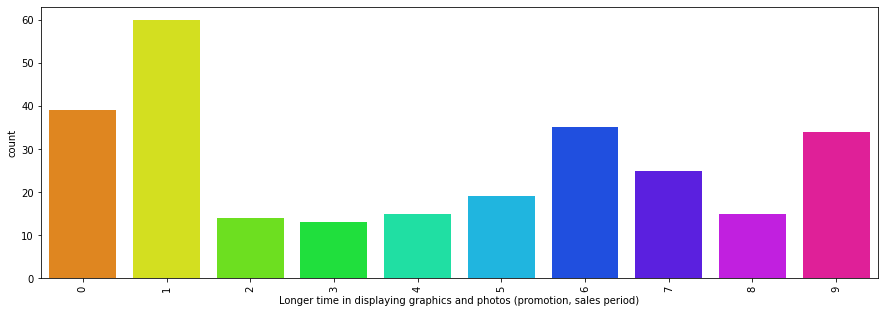

*******************************************************************************************************************************



4    75
5    52
7    41
3    38
0    38
2    13
6     7
1     5
Name: Late declaration of price (promotion, sales period), dtype: int64


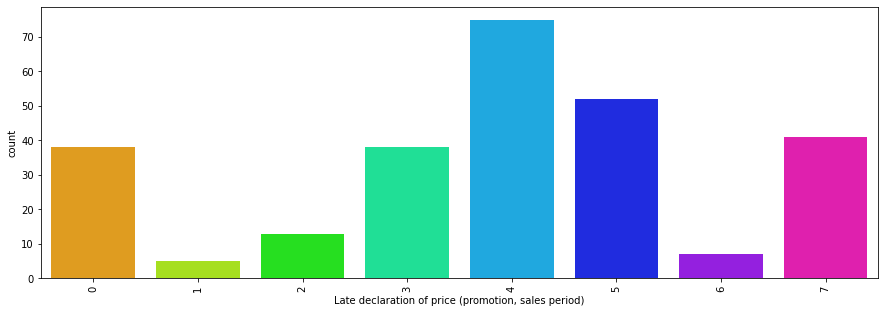

*******************************************************************************************************************************



7     61
8     59
5     32
10    23
1     18
0     16
9     15
4     14
2     13
6     11
3      7
Name: Longer page loading time (promotion, sales period), dtype: int64


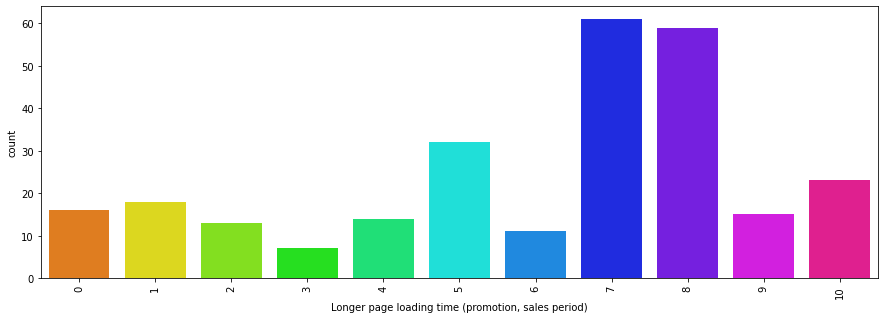

*******************************************************************************************************************************



7    87
0    62
3    31
1    29
5    25
6    15
2    13
4     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


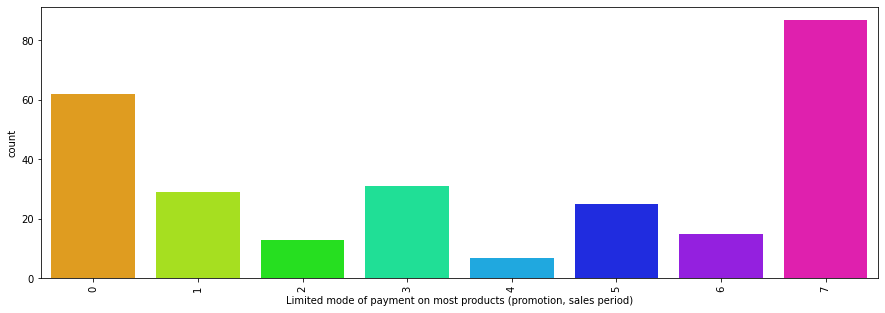

*******************************************************************************************************************************



3    72
5    64
1    44
0    37
4    26
2    26
Name: Longer delivery period, dtype: int64


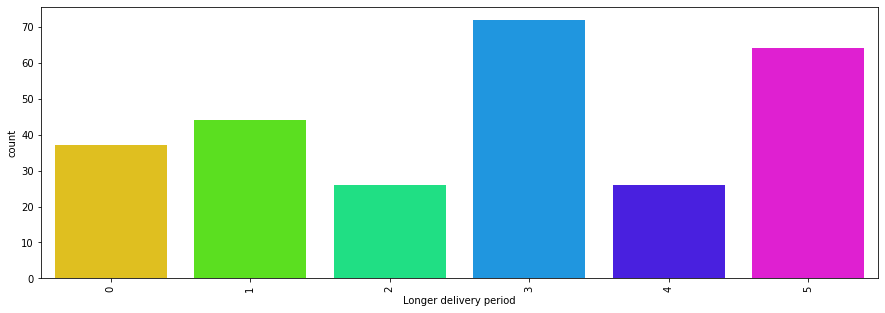

*******************************************************************************************************************************



0    96
5    63
1    45
4    30
2    20
6     8
3     7
Name: Change in website/Application design, dtype: int64


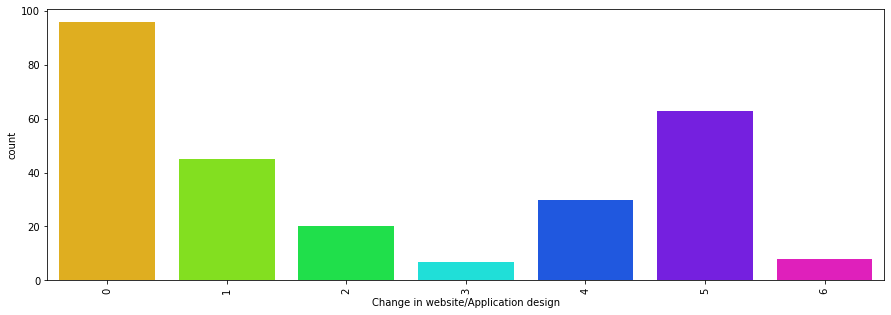

*******************************************************************************************************************************



0    53
4    52
7    49
6    39
2    26
1    25
5    14
3    11
Name: Frequent disruption when moving from one page to another, dtype: int64


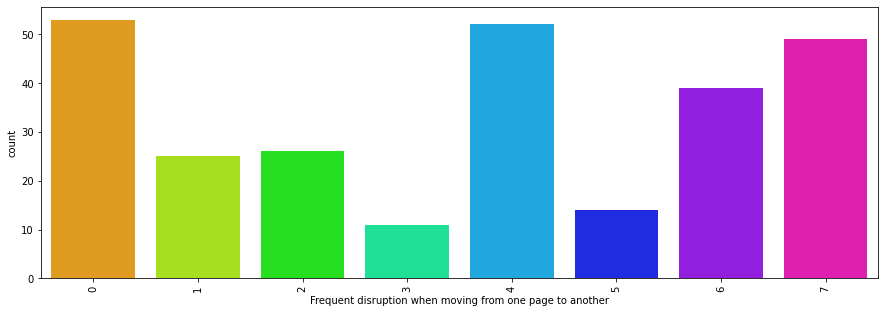

*******************************************************************************************************************************



0    94
4    47
1    45
2    25
3    18
6    15
5    14
7    11
Name: Website is as efficient as before, dtype: int64


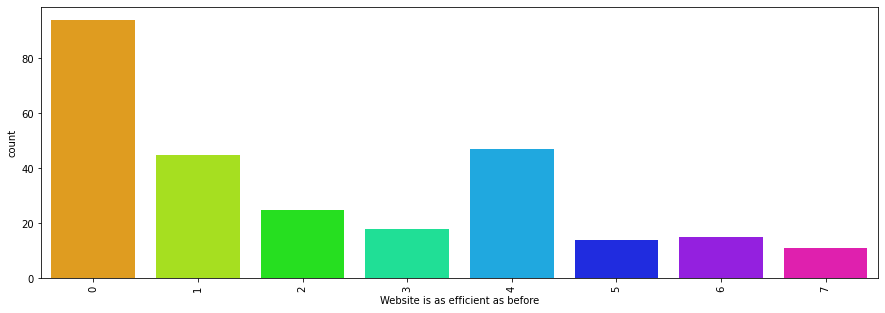

*******************************************************************************************************************************



0    79
1    62
6    39
3    30
5    20
2    15
4    13
7    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


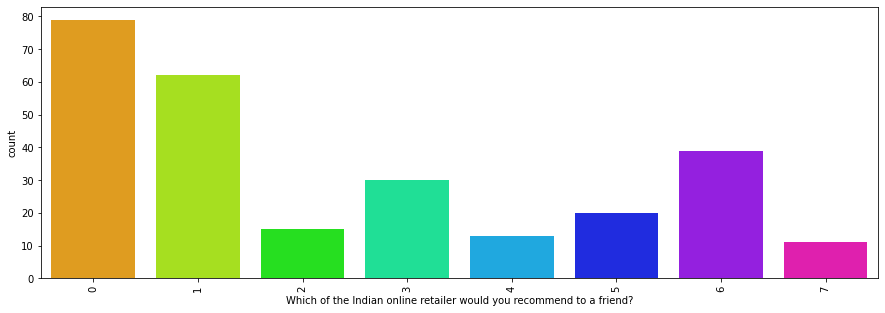

*******************************************************************************************************************************





In [71]:
#Customer Satisfaction Columns
customer_cols=df.iloc[:,47:].columns
Customer_Experience_columns=customer_cols.to_list()

Customer_Experience_columns

for col in Customer_Experience_columns:
        print(df[col].value_counts())
        plt.figure(figsize=(15,5))
        sn.countplot(x=df[col],palette="hsv")
        plt.xticks(rotation=90)
        plt.show()
        print("*"*127)
        print("\n\n")

In [37]:
#outliers remover
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(269, 71)
(249, 71)


In [38]:
X = df.drop(['1Gender of respondent'], axis=1)



y = df['1Gender of respondent']

# models

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=30)

In [40]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9833333333333333
[[41  0]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.95      0.97        19

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



In [41]:
dtcscores=cross_val_score(dtc,X,y,cv=6)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.8        0.97777778 1.         1.         1.         1.        ]
0.9629629629629629 0.07332959212304936


In [42]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9166666666666666
[[40  1]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.94      0.79      0.86        19

    accuracy                           0.92        60
   macro avg       0.92      0.88      0.90        60
weighted avg       0.92      0.92      0.91        60



C:\Users\jesus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
lrscores=cross_val_score(dtc,X,y,cv=6)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.75555556 0.95555556 1.         1.         1.         1.        ]
0.9518518518518518 0.0892738577273626


In [23]:

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.95
[[40  1]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.94      0.89      0.92        19

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.95      0.95      0.95        60



In [49]:
rfscores=cross_val_score(dtc,X,y,cv=6)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.8        0.95555556 1.         1.         1.         1.        ]
0.9592592592592593 0.0730484552715408


In [24]:

gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.75
[[34  7]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.61      0.58      0.59        19

    accuracy                           0.75        60
   macro avg       0.71      0.70      0.71        60
weighted avg       0.75      0.75      0.75        60



In [50]:
gnbscores=cross_val_score(dtc,X,y,cv=6)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.75555556 0.97777778 1.         1.         1.         1.        ]
0.9555555555555556 0.08981004187394179


In [51]:

svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.8666666666666667
[[37  4]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.79      0.79      0.79        19

    accuracy                           0.87        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.87      0.87      0.87        60



In [52]:
svcscores=cross_val_score(dtc,X,y,cv=6)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.75555556 0.95555556 1.         1.         1.         1.        ]
0.9518518518518518 0.0892738577273626


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters ={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [55]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [56]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [57]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [58]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [59]:
accuracy_score(y_test,GCV_pred)

0.9833333333333333

Evaluation: DecisionTreeClassifier
            ACCURACY:  0.9833333333333333
            CONFUSION MATRIX:
[[41  0]
 [ 1 18]]
            AUC: 0.97
            ROC curve


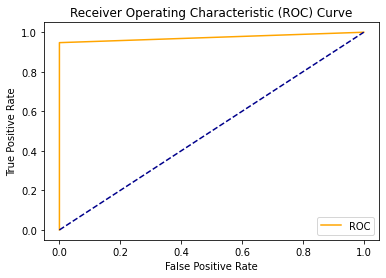

In [82]:
# Create Train & Test Data
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=30)

# Running DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

from sklearn import metrics
preds_lr = dtc.predict(x_test)

print("Evaluation: DecisionTreeClassifier")
# Print the prediction accuracy
print ("            ACCURACY: ",metrics.accuracy_score(y_test, preds_lr))

# Create the Confusion matrix
print("            CONFUSION MATRIX:")
print(confusion_matrix(y_test,preds_lr))



#Defining function for Performance metric : AOC (AREA UNDER CURVE)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


probs = dtc.predict_proba(x_test)

#keeping only the probabilty of positive class
probs = probs[:, 1]

#Computing AUC curve
auc = roc_auc_score(y_test, probs)
print('            AUC: %.2f' % auc)

#Getting AUC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("            ROC curve")
plot_roc_curve(fpr, tpr)

# CONCLUSION:
The purpose of this study is to understand the influence of utilitarian values, hedonic values, customer experience and perceived risk on E-commerce customer satisfaction in India.

The analysis shows that the  Utilitarian  Value  significantly  influences  Customer  Satisfaction, meaning that the level of Utilitarian Value of e-commerce  customers  will  affect  the  level  of  Customer  Satisfaction. In other words, the better (higher) Utilitarian Value given by e-commerce products will lead to satisfaction with customers.  Hedonic Value significantly influences Customer Satisfaction, meaning that the high and low Hedonic Value of e-commerce customers will affect the level of Customer Satisfaction.  In other words, the higher the Hedonic Value given by e-commerce products will lead to the satisfaction of e-commerce customers.
The following factors should be considered by the E-commerce websites to improve the customer satisfaction:
1. Utilitarian Value
•Product offerings
•Product information
•Monetary savings
•Convenience

2. Hedonic Value
•Adventure Shopping
•Social Shopping
•Gratification Shopping
•Idea Shopping
•Role Shopping
•Value Shopping

3. Social Value
•Feel acceptable
•Good impression
•I am perceived
•Social approval

4. Perceived Risk
•Financial Risk
•Functional Risk
•Physical Risk
•Psychological Risk
•Social Risk
•Temporal Risk

5. Customer Satisfaction
•Purchasing Experience
•Site Selection


On the basis of these factors we could see that,

1. Amazon.in
2. Flipkart.com

are doing great in their performance on customer satisfaction and retention.